### 21133031 - Huỳnh Gia Hân
## ĐỒ ÁN MÔN HỌC - TƯƠNG TÁC DỮ LIỆU TRỰC QUAN 

# NỘI DUNG
Sử dụng ngôn ngữ Python và công cụ Jupyter Notebook để thực hiện các yêu cầu sau:
## 1. Đọc và hiển thị các thông tin từ file covid_19.csv. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
df_raw = pd.read_csv('covid_19.csv')

### a. In ra danh sách các cột.  

In [3]:
print('Danh sách các cột: ', df_raw.columns.values)


Danh sách các cột:  ['Province/State' 'Country/Region' 'Lat' 'Long' 'Date' 'Confirmed'
 'Deaths' 'Recovered' 'Active' 'WHO Region']


In [4]:
print(df_raw.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14664 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB
None


### b. Loại bỏ các dòng có giá trị bị thiếu (NaN) (các câu hỏi sau sử dụng dữ liệu đã được loại bỏ giá trị bị thiếu).  

In [5]:
print('Số lượng các dòng có giá trị bị thiếu trong Dataframe:')
print(df_raw.isna().sum())

Số lượng các dòng có giá trị bị thiếu trong Dataframe:
Province/State    34404
Country/Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths                0
Recovered             0
Active                0
WHO Region            0
dtype: int64


In [6]:
df_clean = df_raw.dropna()

In [7]:
print('Dataframe sau khi loại bỏ các dòng có giá trị bị thiếu (NaN): ')
display(df_clean.head(5))

Dataframe sau khi loại bỏ các dòng có giá trị bị thiếu (NaN): 


,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
8,Australian Capital Territory,Australia,-35.4735,149.0124,2020-01-22,0,0,0,0,Western Pacific
9,New South Wales,Australia,-33.8688,151.2093,2020-01-22,0,0,0,0,Western Pacific
10,Northern Territory,Australia,-12.4634,130.8456,2020-01-22,0,0,0,0,Western Pacific
11,Queensland,Australia,-27.4698,153.0251,2020-01-22,0,0,0,0,Western Pacific
12,South Australia,Australia,-34.9285,138.6007,2020-01-22,0,0,0,0,Western Pacific


In [8]:
print('Kiểm tra lại số lượng các dòng có giá trị bị thiếu trong Dataframe: ')
print(df_clean.isna().sum())

Kiểm tra lại số lượng các dòng có giá trị bị thiếu trong Dataframe: 
Province/State    0
Country/Region    0
Lat               0
Long              0
Date              0
Confirmed         0
Deaths            0
Recovered         0
Active            0
WHO Region        0
dtype: int64


### c. In ra số dòng dữ liệu của bảng.

In [9]:
print('Số dòng dữ liệu trong bảng (tập dữ liệu gốc) là: ', df_raw.shape[0])

Số dòng dữ liệu trong bảng (tập dữ liệu gốc) là:  49068


In [10]:
print('Số dòng dữ liệu trong bảng (sau khi loại bỏ các dòng bị thiếu) là: ', df_clean.shape[0])

Số dòng dữ liệu trong bảng (sau khi loại bỏ các dòng bị thiếu) là:  14664


## 2. In ra tổng số lượng quốc gia có trong tập dữ liệu

In [11]:
num_countries = df_raw['Country/Region'].nunique()

In [12]:
print('Số lượng quốc gia có trong tập dữ liệu (gốc): ', num_countries)

Số lượng quốc gia có trong tập dữ liệu (gốc):  187


In [13]:
num_countries_not_Nan = df_clean['Country/Region'].nunique()

In [14]:
print('Số lượng quốc gia có trong tập dữ liệu (sau khi loại bỏ các dòng bị thiếu): ', num_countries_not_Nan)

Số lượng quốc gia có trong tập dữ liệu (sau khi loại bỏ các dòng bị thiếu):  8


## 3. Xác định và in ra quốc gia có số lượng ca nhiễm cao nhất, số ca tử vong cao nhất và số ca phục hồi cao nhất. (sử dụng hàm idmax)

* Sử dụng Dataframe đã loại giá trị NaN

In [15]:
df_clean['Date'] = pd.to_datetime(df_clean['Date'])

f_date = '2020-07-27'
df_specific_date = df_clean[df_clean['Date'] == f_date]

C:\Users\hghaa\AppData\Local\Temp\ipykernel_6100\2960056384.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Date'] = pd.to_datetime(df_clean['Date'])


In [16]:
df_country = df_specific_date.groupby('Country/Region').sum(numeric_only=True)

In [17]:
index_confirmed = df_country['Confirmed'].idxmax()
index_deaths = df_country['Deaths'].idxmax()
index_recovered = df_country['Recovered'].idxmax()

In [18]:
country_max_confirmed = df_country.loc[index_confirmed, 'Confirmed']
country_max_deaths = df_country.loc[index_deaths, 'Deaths']
country_max_recovered = df_country.loc[index_recovered, 'Recovered']

In [19]:
print('Quốc gia có số lượng ca nhiễm cao nhất: {0} có {1} số lượng ca nhiễm'.format(index_confirmed, country_max_confirmed))
print('Quốc gia có số lượng ca tử vong cao nhất: {0} có {1} số lượng ca tử vong'.format(index_deaths, country_max_deaths))
print('Quốc gia có số lượng ca phục hồi cao nhất: {0} có {1} số lượng ca phục hồi'.format(index_recovered, country_max_recovered))

Quốc gia có số lượng ca nhiễm cao nhất: Canada có 116458 số lượng ca nhiễm
Quốc gia có số lượng ca tử vong cao nhất: Canada có 8944 số lượng ca tử vong
Quốc gia có số lượng ca phục hồi cao nhất: China có 78869 số lượng ca phục hồi


* Sử dụng Dataframe gốc

In [20]:
df_raw['Date'] = pd.to_datetime(df_raw['Date'])
f_date = '2020-07-27'
df_specific_date = df_raw[df_raw['Date'] == f_date]

df_raw_country = df_specific_date.groupby('Country/Region').sum(numeric_only=True)

index_confirmed = df_raw_country['Confirmed'].idxmax()
index_deaths = df_raw_country['Deaths'].idxmax()
index_recovered = df_raw_country['Recovered'].idxmax()

country_max_confirmed = df_raw_country.loc[index_confirmed, 'Confirmed']
country_max_deaths = df_raw_country.loc[index_deaths, 'Deaths']
country_max_recovered = df_raw_country.loc[index_recovered, 'Recovered']


print('Quốc gia có số lượng ca nhiễm cao nhất: {0} có {1} số lượng ca nhiễm'.format(index_confirmed, country_max_confirmed))
print('Quốc gia có số lượng ca tử vong cao nhất: {0} có {1} số lượng ca tử vong'.format(index_deaths, country_max_deaths))
print('Quốc gia có số lượng ca phục hồi cao nhất: {0} có {1} số lượng ca phục hồi'.format(index_recovered, country_max_recovered))

Quốc gia có số lượng ca nhiễm cao nhất: US có 4290259 số lượng ca nhiễm
Quốc gia có số lượng ca tử vong cao nhất: US có 148011 số lượng ca tử vong
Quốc gia có số lượng ca phục hồi cao nhất: Brazil có 1846641 số lượng ca phục hồi


## 4. In ra số ca tử vong trung bình, số ca phục hồi trung bình và tính số ca nhiễm trung bình trên toàn thế giới

In [21]:
num_rows = df_clean.shape[0]

In [22]:
num_deaths = df_clean['Deaths'].sum()
num_recovered = df_clean['Recovered'].sum()
num_confirmed = df_clean['Confirmed'].sum()

In [23]:
avg_rate_deaths = (num_deaths / num_rows).mean()
avg_rate_recovered = (num_recovered / num_rows).mean()
avg_rate_confirmed = (num_confirmed / num_rows).mean()

In [24]:
print('Số ca tử vong trung bình trên toàn thế giới là: {:.2f} (khoảng {} ca)'.format(avg_rate_deaths, round(avg_rate_deaths)))
print('Số ca phục hồi trung bình trên toàn thế giới là: {:.2f} (khoảng {} ca)'.format(avg_rate_recovered, round(avg_rate_recovered)))
print('Số ca nhiễm trung bình trên toàn thế giới là: {:.2f} (khoảng {} ca)'.format(avg_rate_confirmed, round(avg_rate_confirmed)))

Số ca tử vong trung bình trên toàn thế giới là: 95.51 (khoảng 96 ca)
Số ca phục hồi trung bình trên toàn thế giới là: 865.61 (khoảng 866 ca)
Số ca nhiễm trung bình trên toàn thế giới là: 1717.70 (khoảng 1718 ca)


## 5. Viết hàm calculate_daily_changes để tính toán số lượng ca nhiễm mới, số lượng ca tử vong và số lượng ca phục hồi mới từ DataFrame vừa lấy được từ file covid_19.csv. Giá trị trả về là một DataFrame mới chứa các cột ObservationDate, NewConfirmed, NewDeaths và NewRecovered, trong đó
    a. NewConfirmed: Số lượng ca nhiễm mới hàng ngày (tính bằng sự chênh lệch giữa số ca nhiễm ở ngày hiện tại và ngày trước đó.)
    b. NewDeaths: Số lượng ca tử vong mới hàng ngày (tính bằng sự chênh lệch giữa số lượng ca tử vong ở ngày hiện tại và ngày trước đó)
    c. NewRecovered: Số lượng ca phục hồi mới hàng ngày (tính bằng sự chênh lệch giữa số lượng ca phục hồi ở ngày hiện tại và ngày trước đó)
    Biểu diễn dữ liệu theo ngày và sắp xếp theo thứ tự tăng dần của cột ObservationDate.
Gợi ý:  
• Sử dụng phương thức diff của DataFrame để tính sự chênh lệch giữa các hàng.  
• Đảm bảo kiểm tra và xử lý các giá trị thiếu (NaN) nếu cần

In [25]:
def calculate_daily_changes(df):
    df['Date'] = pd.to_datetime(df['Date'])
    
    daily_totals = df.groupby('Date').sum().reset_index()

    daily_totals['NewConfirmed'] = daily_totals['Confirmed'].diff().fillna(0).astype(int)
    daily_totals['NewDeaths'] = daily_totals['Deaths'].diff().fillna(0).astype(int)
    daily_totals['NewRecovered'] = daily_totals['Recovered'].diff().fillna(0).astype(int)
    
    new_df = daily_totals[['Date', 'NewConfirmed', 'NewDeaths', 'NewRecovered']]
    
    new_df = new_df.rename(columns={'Date': 'ObservationDate'})
    
    return new_df

In [26]:
df_new_clean = calculate_daily_changes(df_clean)

C:\Users\hghaa\AppData\Local\Temp\ipykernel_6100\2745341175.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date'])


In [27]:
display(df_new_clean.head(5))

,ObservationDate,NewConfirmed,NewDeaths,NewRecovered
0,2020-01-22,0,0,0
1,2020-01-23,95,1,2
2,2020-01-24,277,8,6
3,2020-01-25,486,16,3
4,2020-01-26,674,14,10


## 6. Tạo một DataFrame mới chỉ chứa các hàng có Country/Region là “Vietnam”


* Sử dụng dataframe đã loại giá trị NaN

In [28]:
df_vietnam = df_clean.loc[df_clean['Country/Region'] == 'Vietnam']

display(df_vietnam)

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region


* Sử dụng dataframe với data gốc

In [29]:
df_vietnam = df_raw.loc[df_raw['Country/Region'] == 'Vietnam']

display(df_vietnam.head(5))

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
226,NaN,Vietnam,14.058324,108.277199,2020-01-22,0,0,0,0,Western Pacific
487,NaN,Vietnam,14.058324,108.277199,2020-01-23,2,0,0,2,Western Pacific
748,NaN,Vietnam,14.058324,108.277199,2020-01-24,2,0,0,2,Western Pacific
1009,NaN,Vietnam,14.058324,108.277199,2020-01-25,2,0,0,2,Western Pacific
1270,NaN,Vietnam,14.058324,108.277199,2020-01-26,2,0,0,2,Western Pacific


## 7. Từ DataFrame trên, thêm cột (Info01) cho biết số ca nhiễm mới (Confimed) mỗi ngày là tăng (giá trị 1), giảm (giá trị -1), bằng (giá trị 0) so với số ca nhiễm trước đó

In [30]:
def info01(change):
    if change > 0:
        return 1
    elif change < 0:
        return -1
    else:
        return 0

* Sử dụng trên tập data đã loại giá trị NaN (df_clean)

In [31]:
df_clean['Date'] = pd.to_datetime(df_clean['Date'])

df_clean_confirmed = df_clean.groupby('Date').agg({'Confirmed': 'sum'}).reset_index()

display(df_clean_confirmed.head(5))

C:\Users\hghaa\AppData\Local\Temp\ipykernel_6100\656390568.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Date'] = pd.to_datetime(df_clean['Date'])


,Date,Confirmed
0,2020-01-22,548
1,2020-01-23,643
2,2020-01-24,920
3,2020-01-25,1406
4,2020-01-26,2080


In [32]:
df_info01 = pd.merge(df_clean_confirmed, df_new_clean, left_on='Date', right_on='ObservationDate', how='left')

df_info01 = df_info01[['Date', 'Confirmed', 'NewConfirmed']]

In [33]:
df_info01['Change'] = df_info01['NewConfirmed'].diff().fillna(0)

df_info01['Info01'] = df_info01['Change'].apply(info01)

df_info01 = df_info01[['Date', 'Confirmed', 'NewConfirmed', 'Info01']]

In [34]:
display(df_info01.head(5))
display(df_info01.tail(5))

,Date,Confirmed,NewConfirmed,Info01
0,2020-01-22,548,0,0
1,2020-01-23,643,95,1
2,2020-01-24,920,277,1
3,2020-01-25,1406,486,1
4,2020-01-26,2080,674,1


,Date,Confirmed,NewConfirmed,Info01
183,2020-07-23,227231,1279,1
184,2020-07-24,228654,1423,1
185,2020-07-25,229743,1089,-1
186,2020-07-26,230831,1088,-1
187,2020-07-27,232318,1487,1


* Sử dụng trên tập data ở câu 6 (df_vietnam)

In [35]:
df_vietnam['Date'] = pd.to_datetime(df_vietnam['Date'])

df_vietnam_confirmed = df_vietnam.groupby('Date').agg({'Confirmed': 'sum'}).reset_index()

display(df_vietnam_confirmed.head(5))

C:\Users\hghaa\AppData\Local\Temp\ipykernel_6100\2200907271.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vietnam['Date'] = pd.to_datetime(df_vietnam['Date'])


,Date,Confirmed
0,2020-01-22,0
1,2020-01-23,2
2,2020-01-24,2
3,2020-01-25,2
4,2020-01-26,2


In [36]:
df_new_vietnam = calculate_daily_changes(df_vietnam)

C:\Users\hghaa\AppData\Local\Temp\ipykernel_6100\2745341175.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date'])


In [37]:
df_info01_vietnam = pd.merge(df_vietnam_confirmed, df_new_vietnam, left_on='Date', right_on='ObservationDate', how='left')

df_info01_vietnam = df_info01_vietnam[['Date', 'Confirmed', 'NewConfirmed']]

In [38]:
df_info01_vietnam['Change'] = df_info01_vietnam['NewConfirmed'].diff().fillna(0)

df_info01_vietnam['Info01'] = df_info01_vietnam['Change'].apply(info01)

df_info01_vietnam = df_info01_vietnam[['Date', 'Confirmed', 'NewConfirmed', 'Info01']]

In [39]:
display(df_info01_vietnam.head(5))
display(df_info01_vietnam.tail(5))

,Date,Confirmed,NewConfirmed,Info01
0,2020-01-22,0,0,0
1,2020-01-23,2,2,1
2,2020-01-24,2,0,-1
3,2020-01-25,2,0,0
4,2020-01-26,2,0,0


,Date,Confirmed,NewConfirmed,Info01
183,2020-07-23,412,4,-1
184,2020-07-24,415,3,-1
185,2020-07-25,417,2,-1
186,2020-07-26,420,3,1
187,2020-07-27,431,11,1


## 8. Vẽ biểu đồ đường thể hiện sự thay đổi số ca nhiễm mới hàng ngày ở Việt Nam trong khoảng thời gian từ tháng 1 đến tháng 7 năm 2020

In [40]:
df_info01_vietnam['Month'] = df_info01_vietnam['Date'].dt.month

df_info01_vietnam = df_info01_vietnam[(df_info01_vietnam['Date'].dt.year == 2020) & (df_info01_vietnam['Month'] <= 7)]

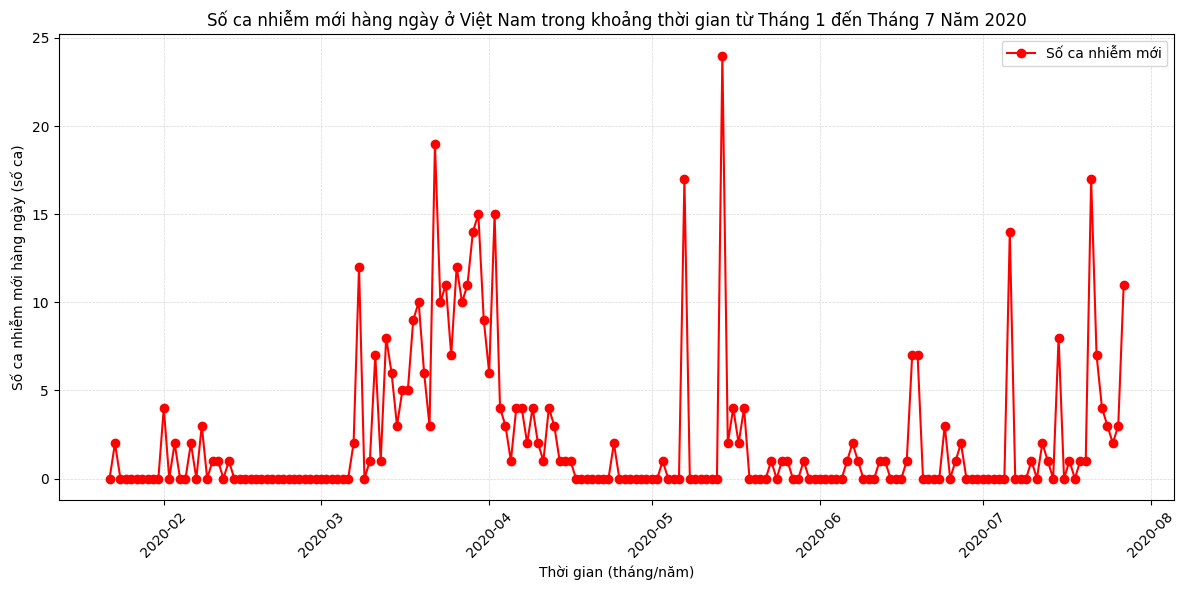

In [41]:
plt.figure(figsize=(12, 6))
plt.plot(df_info01_vietnam['Date'], df_info01_vietnam['NewConfirmed'], marker='o', linestyle='-', color='red', label='Số ca nhiễm mới')
plt.title('Số ca nhiễm mới hàng ngày ở Việt Nam trong khoảng thời gian từ Tháng 1 đến Tháng 7 Năm 2020')
plt.xlabel('Thời gian (tháng/năm)')
plt.ylabel('Số ca nhiễm mới hàng ngày (số ca)')
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.5)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 9. Xây dựng mô hình hồi quy tuyến tính để dự đoán số ca nhiễm COVID_19 dựa trên dữ liệu đọc từ file covide_19.

* Sử dụng trên dataframe đã loại bỏ NaN

In [42]:
df_model = df_clean.groupby('Date')['Confirmed'].sum().reset_index()

display(df_model.head())

,Date,Confirmed
0,2020-01-22,548
1,2020-01-23,643
2,2020-01-24,920
3,2020-01-25,1406
4,2020-01-26,2080


In [43]:
X = df_model[['Date']]
y = df_model['Confirmed']

X['Date'] = (X['Date'] - X['Date'].min()).dt.days


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

C:\Users\hghaa\AppData\Local\Temp\ipykernel_6100\3315013789.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Date'] = (X['Date'] - X['Date'].min()).dt.days


In [44]:
model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [45]:
y_pred = model.predict(X_test)

In [46]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error (MSE): {}'.format(mse))
print('Root Mean Squared Error (RMSE): {}'.format(rmse))
print('Mean Absolute Error (MAE): {}'.format(mae))
print('R^2 Score: {}'.format(r2))

Mean Squared Error (MSE): 115217171.51573926
Root Mean Squared Error (RMSE): 10733.926192951918
Mean Absolute Error (MAE): 9295.391928638206
R^2 Score: 0.9757926146787251


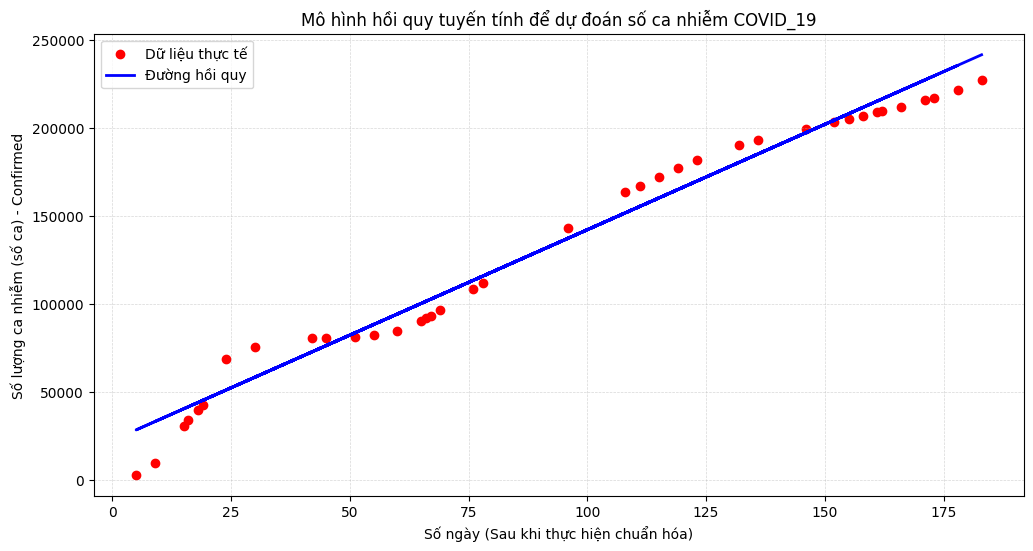

In [47]:
plt.figure(figsize=(12, 6))
plt.scatter(X_test['Date'], y_test, color='red', label='Dữ liệu thực tế')
plt.plot(X_test['Date'], y_pred, color='blue', linewidth=2, label='Đường hồi quy')
plt.xlabel('Số ngày (Sau khi thực hiện chuẩn hóa)')
plt.ylabel('Số lượng ca nhiễm (số ca) - Confirmed')
plt.title('Mô hình hồi quy tuyến tính để dự đoán số ca nhiễm COVID_19')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.5)
plt.show()

> Thử với một ví dụ tự cho

In [48]:
def PreprocessingDate(date): # Tiền xử lý dữ liệu date nhập vào
    date = pd.to_datetime(date)

    days_since_start = (date - df_model['Date'].min()).days

    sample_X = pd.DataFrame({'Date': [days_since_start]})

    return sample_X

In [49]:
date_input = '2021-05-22'  # Ngày nhập vào

sample_X = PreprocessingDate(date_input)

predicted_confirmed = model.predict(sample_X)

print(f'Dự đoán số ca nhiễm COVID-19 cho ngày {date_input}: {int(predicted_confirmed[0])}')

Dự đoán số ca nhiễm COVID-19 cho ngày 2021-05-22: 604824


* Sử dụng trên tập dữ liệu gốc

In [50]:
df_model = df_raw.groupby('Date')['Confirmed'].sum().reset_index()

display(df_model.head())

X = df_model[['Date']]
y = df_model['Confirmed']

X['Date'] = (X['Date'] - X['Date'].min()).dt.days


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

,Date,Confirmed
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118


C:\Users\hghaa\AppData\Local\Temp\ipykernel_6100\3099349985.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Date'] = (X['Date'] - X['Date'].min()).dt.days


In [51]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error (MSE): {}'.format(mse))
print('Root Mean Squared Error (RMSE): {}'.format(rmse))
print('Mean Absolute Error (MAE): {}'.format(mae))
print('R^2 Score: {}'.format(r2))

Mean Squared Error (MSE): 2647599175915.639
Root Mean Squared Error (RMSE): 1627144.485261109
Mean Absolute Error (MAE): 1421366.146340616
R^2 Score: 0.8907655160158672


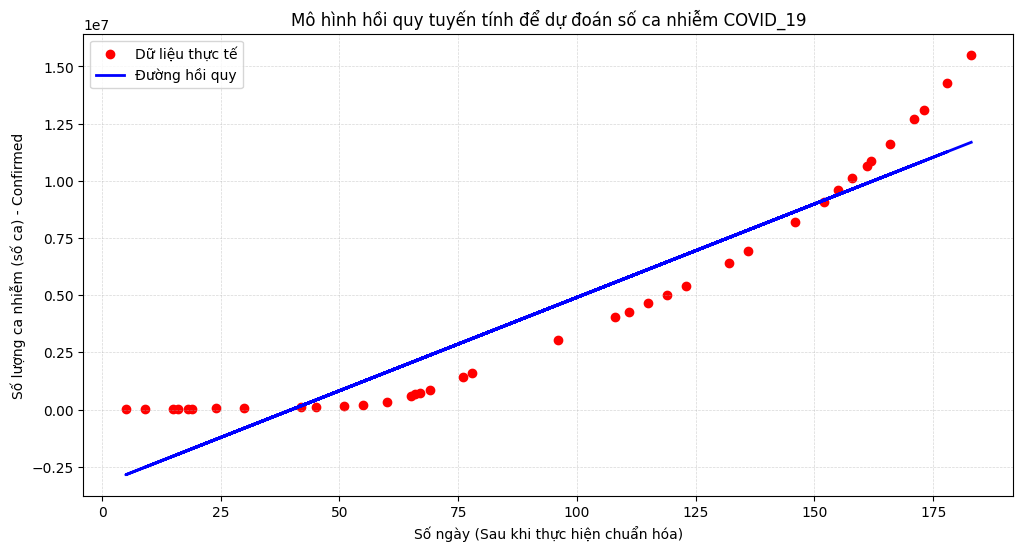

In [52]:
plt.figure(figsize=(12, 6))
plt.scatter(X_test['Date'], y_test, color='red', label='Dữ liệu thực tế')
plt.plot(X_test['Date'], y_pred, color='blue', linewidth=2, label='Đường hồi quy')
plt.xlabel('Số ngày (Sau khi thực hiện chuẩn hóa)')
plt.ylabel('Số lượng ca nhiễm (số ca) - Confirmed')
plt.title('Mô hình hồi quy tuyến tính để dự đoán số ca nhiễm COVID_19')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.5)
plt.show()

Thử một ví dụ tự cho

In [53]:
date_input = '2021-05-22'  # Ngày nhập vào

sample_X = PreprocessingDate(date_input)

predicted_confirmed = model.predict(sample_X)

print(f'Dự đoán số ca nhiễm COVID-19 cho ngày {date_input}: {int(predicted_confirmed[0])}')

Dự đoán số ca nhiễm COVID-19 cho ngày 2021-05-22: 36428626


### Làm thêm: Xây dựng mô hình KNN Regression (sử dụng trên tập dữ liệu đã loại bỏ NaN)

In [54]:
X = df_model[['Date']]
y = df_model['Confirmed']

X['Date'] = (X['Date'] - X['Date'].min()).dt.days

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn = KNeighborsRegressor(n_neighbors=3)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)


C:\Users\hghaa\AppData\Local\Temp\ipykernel_6100\1317619445.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Date'] = (X['Date'] - X['Date'].min()).dt.days


In [55]:
mse_knn = mean_squared_error(y_test, y_pred)
rmse_knn = np.sqrt(mse)
mae_knn = mean_absolute_error(y_test, y_pred)
r2_knn = r2_score(y_test, y_pred)

print('Mean Squared Error (MSE): {}'.format(mse_knn))
print('Root Mean Squared Error (RMSE): {}'.format(rmse_knn))
print('Mean Absolute Error (MAE): {}'.format(mae_knn))
print('R^2 Score: {}'.format(r2_knn))

Mean Squared Error (MSE): 6587322445.85672
Root Mean Squared Error (RMSE): 1627144.485261109
Mean Absolute Error (MAE): 61107.184210526306
R^2 Score: 0.9997282206556204


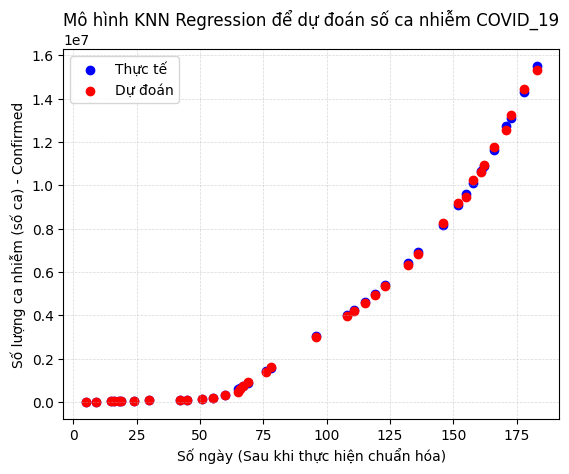

In [56]:
plt.scatter(X_test, y_test, color='blue', label='Thực tế')
plt.scatter(X_test, y_pred, color='red', label='Dự đoán')
plt.xlabel('Số ngày (Sau khi thực hiện chuẩn hóa)')
plt.ylabel('Số lượng ca nhiễm (số ca) - Confirmed')
plt.title('Mô hình KNN Regression để dự đoán số ca nhiễm COVID_19')
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.5)
plt.legend()
plt.show()

In [57]:
date_input = '2021-05-22'  # Ngày nhập vào

sample_X = PreprocessingDate(date_input)

predicted_confirmed = knn.predict(sample_X)

print(f'Dự đoán số ca nhiễm COVID-19 cho ngày {date_input}: {int(predicted_confirmed[0])}')

Dự đoán số ca nhiễm COVID-19 cho ngày 2021-05-22: 16259823
